# Problem Statement
The objective of this project is to build an application that detects the mood of users using still images or videos and recommends music accordingly. The system will use image or video analysis to infer the user's mood and provide personalized music recommendations to enhance their emotional experience.

# Importing Required Libraries

In [1]:
import pandas as pd
import os
import glob as gb
from tensorflow import keras

from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

# Part 1 Data Preparing for Music Recommendation

## Loading Data

In [2]:
df = pd.read_csv("/Users/shashi/Documents/capstone project5/MoodforMusic/data_moods.csv")

## Exploratory Data Analysis (EDA)

In [3]:
df.head()

,name,album,artist,id,release_date,popularity,length,danceability,acousticness,energy,instrumentalness,liveness,valence,loudness,speechiness,tempo,key,time_signature,mood
0,1999,1999,Prince,2H7PHVdQ3mXqEHXcvclTB0,1982-10-27,68,379266,0.866,0.13700,0.730,0.000000,0.0843,0.625,-8.201,0.0767,118.523,5,4,Happy
1,23,23,Blonde Redhead,4HIwL9ii9CcXpTOTzMq0MP,2007-04-16,43,318800,0.381,0.01890,0.832,0.196000,0.1530,0.166,-5.069,0.0492,120.255,8,4,Sad
2,9 Crimes,9,Damien Rice,5GZEeowhvSieFDiR8fQ2im,2006-11-06,60,217946,0.346,0.91300,0.139,0.000077,0.0934,0.116,-15.326,0.0321,136.168,0,4,Sad
3,99 Luftballons,99 Luftballons,Nena,6HA97v4wEGQ5TUClRM0XLc,1984-08-21,2,233000,0.466,0.08900,0.438,0.000006,0.1130,0.587,-12.858,0.0608,193.100,4,4,Happy
4,A Boy Brushed Red Living In Black And White,They're Only Chasing Safety,Underoath,47IWLfIKOKhFnz1FUEUIkE,2004-01-01,60,268000,0.419,0.00171,0.932,0.000000,0.1370,0.445,-3.604,0.1060,169.881,1,4,Energetic


In [4]:
df.tail()

,name,album,artist,id,release_date,popularity,length,danceability,acousticness,energy,instrumentalness,liveness,valence,loudness,speechiness,tempo,key,time_signature,mood
681,windcatcher,windcatcher,Leo Nocta,59VApBbrS2IADQk4ml5mdo,2020-06-19,36,123066,0.402,0.961,0.2360,0.919000,0.0921,0.1460,-20.615,0.0603,129.736,0,3,Calm
682,yellow is the color of her eyes,yellow is the color of her eyes,Soccer Mommy,4D3nttJPU6L0M2epr7sId6,2019-11-19,5,435080,0.452,0.757,0.5150,0.120000,0.1400,0.1910,-7.351,0.0255,80.537,11,4,Sad
683,you broke me first,you broke me first,Tate McRae,45bE4HXI0AwGZXfZtMp8JR,2020-04-17,87,169265,0.642,0.786,0.3740,0.000000,0.0906,0.0799,-9.386,0.0545,124.099,4,4,Sad
684,you were good to me,brent,Jeremy Zucker,4CxFN5zON70B3VOPBYbd6P,2019-05-03,76,219146,0.561,0.913,0.0848,0.000026,0.1120,0.2060,-15.099,0.0404,102.128,2,4,Sad
685,æfre,æfre,praam,2irbT1BSYaIEF44PlyKaoM,2020-07-17,41,186331,0.377,0.994,0.0156,0.881000,0.0991,0.0804,-28.435,0.0397,140.179,0,4,Calm


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 686 entries, 0 to 685
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              686 non-null    object 
 1   album             686 non-null    object 
 2   artist            686 non-null    object 
 3   id                686 non-null    object 
 4   release_date      686 non-null    object 
 5   popularity        686 non-null    int64  
 6   length            686 non-null    int64  
 7   danceability      686 non-null    float64
 8   acousticness      686 non-null    float64
 9   energy            686 non-null    float64
 10  instrumentalness  686 non-null    float64
 11  liveness          686 non-null    float64
 12  valence           686 non-null    float64
 13  loudness          686 non-null    float64
 14  speechiness       686 non-null    float64
 15  tempo             686 non-null    float64
 16  key               686 non-null    int64  
 1

In [6]:
print(df.describe())

       popularity         length  danceability  acousticness      energy  \
count  686.000000     686.000000    686.000000    686.000000  686.000000   
mean    41.534985  221791.485423      0.500553      0.449749    0.507693   
std     23.045707   63399.058492      0.158955      0.410729    0.326490   
min      0.000000   76773.000000      0.078900      0.000005    0.001290   
25%     30.000000  179114.500000      0.388000      0.014825    0.202000   
50%     47.000000  213273.000000      0.505000      0.359000    0.495500   
75%     57.000000  254569.750000      0.612000      0.905750    0.844000   
max     88.000000  518373.000000      0.941000      0.996000    0.994000   

       instrumentalness    liveness     valence    loudness  speechiness  \
count        686.000000  686.000000  686.000000  686.000000   686.000000   
mean           0.349610    0.166867    0.342438  -11.531020     0.053946   
std            0.410517    0.142128    0.252304    7.468629     0.041374   
min        

## Splitting Data into Training and Testing Sets using scikit-learn

In [7]:
from sklearn.model_selection import train_test_split

# Assuming df is your DataFrame containing the music features and mood labels
X = df.drop(columns=['name', 'album', 'artist', 'id', 'release_date', 'mood'])
y = df['mood']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

 ## Finding the Best Hyperparameters

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Initialize the Random Forest classifier
model = RandomForestClassifier(random_state=42)

# Define hyperparameters to tune
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Perform grid search to find the best hyperparameters
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_

# Access the best model from the grid search
best_model = grid_search.best_estimator_

# Now, you can use this best_model for making predictions or further analysis
# For example:
y_pred = best_model.predict(X_test)

# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of the best model:", accuracy)

# You can also access the best hyperparameters found during the grid search
best_params = grid_search.best_params_
print("Best hyperparameters:", best_params)


Accuracy of the best model: 0.7971014492753623
Best hyperparameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}


After conducting a hyperparameter grid search, we found that the Random Forest Classifier emerged as the best model for our music recommendation system. With the optimal hyperparameters selected, the model achieved an accuracy of 0.79 on the test dataset. This accuracy level indicates a promising performance of the model in predicting music moods for recommendation purposes.

In [9]:
best_model

RandomForestClassifier(random_state=42)

## Training a Random Forest Classifier

In [10]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

## Evaluating Model Performance

In [11]:
from sklearn.metrics import accuracy_score

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7971014492753623


In [12]:
y_pred

array(['Calm', 'Energetic', 'Energetic', 'Happy', 'Energetic', 'Sad',
       'Calm', 'Energetic', 'Calm', 'Sad', 'Happy', 'Sad', 'Calm',
       'Energetic', 'Sad', 'Sad', 'Calm', 'Happy', 'Happy', 'Calm', 'Sad',
       'Energetic', 'Energetic', 'Energetic', 'Energetic', 'Sad', 'Happy',
       'Calm', 'Sad', 'Energetic', 'Calm', 'Sad', 'Energetic', 'Happy',
       'Happy', 'Sad', 'Calm', 'Calm', 'Sad', 'Calm', 'Sad', 'Energetic',
       'Calm', 'Sad', 'Energetic', 'Calm', 'Energetic', 'Energetic',
       'Energetic', 'Sad', 'Sad', 'Energetic', 'Happy', 'Energetic',
       'Sad', 'Calm', 'Calm', 'Happy', 'Calm', 'Energetic', 'Sad', 'Calm',
       'Sad', 'Calm', 'Calm', 'Energetic', 'Energetic', 'Sad', 'Sad',
       'Energetic', 'Energetic', 'Sad', 'Energetic', 'Energetic', 'Sad',
       'Calm', 'Sad', 'Energetic', 'Calm', 'Sad', 'Sad', 'Calm', 'Sad',
       'Sad', 'Sad', 'Happy', 'Happy', 'Happy', 'Sad', 'Calm',
       'Energetic', 'Happy', 'Sad', 'Energetic', 'Sad', 'Energetic',
       

# Part 2 Data Preparing for Music Mood

# Assigning Path for Dataset

In [13]:
TRAIN_DIR = r"/Users/shashi/Documents/capstone project5/MoodforMusic/train"
TEST_DIR = r"/Users/shashi/Documents/capstone project5/MoodforMusic/test"
BATCH_SIZE=64

### Image Dataset Overview

In [14]:
for folder in os.listdir(TRAIN_DIR):
    files = gb.glob(pathname= str(TRAIN_DIR+ '/'+ folder + '/*.jpg'))
    print(f'For training data, found {len(files)} in folder {folder}')

For training data, found 3995 in folder angry
For training data, found 436 in folder disgust
For training data, found 4097 in folder fear
For training data, found 7215 in folder happy
For training data, found 4965 in folder neutral
For training data, found 4830 in folder sad
For training data, found 3171 in folder surprise


In [15]:
for folder in os.listdir(TEST_DIR):
    files = gb.glob(pathname= str(TEST_DIR+ '/'+ folder + '/*.jpg'))
    print(f'For testing data, found {len(files)} in folder {folder}')

For testing data, found 958 in folder angry
For testing data, found 111 in folder disgust
For testing data, found 1024 in folder fear
For testing data, found 1774 in folder happy
For testing data, found 1233 in folder neutral
For testing data, found 1247 in folder sad
For testing data, found 831 in folder surprise


### Random Image Viewer Function

In [16]:
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def view_random_image(target_dir, target_class):
    # We will view images from here
    target_folder = target_dir + target_class
    
    # Get a random image path
    random_image = random.sample(od.listdir(target_folder), 1)
    
    # read in the image and plot it using matplolib
    img = mpimg.imread(target_folder+'/'+random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis('off')
    print(f"Image shape {img.shape}")
    
    return img

In [17]:
class_names = ["anger","disgust","fear","happy","neutral","sad","surprise"]

### Data Preprocessing with Keras

In [18]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory(TRAIN_DIR,
                                                 target_size = (128, 128),
                                                 batch_size = BATCH_SIZE,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory(TEST_DIR,
                                            target_size = (128, 128),
                                            batch_size = BATCH_SIZE,
                                            class_mode = 'categorical')

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


### Convolutional Neural Network (CNN) Model Architecture

In [19]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential()

# Add convolutional layers
model.add(Conv2D(32, (3, 3), input_shape=(128, 128, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the layers
model.add(Flatten())

# Add dense layers for classification
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=7, activation='softmax'))  # 7 classes for moods

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


## Training CNN Model

In [20]:
history = model.fit(training_set, epochs=130, validation_data=test_set)


Epoch 1/130


449/449 [==============================] - 361s 802ms/step - loss: 1.6671 - accuracy: 0.3377 - val_loss: 1.4751 - val_accuracy: 0.4365
Epoch 2/130
449/449 [==============================] - 280s 623ms/step - loss: 1.4575 - accuracy: 0.4398 - val_loss: 1.3699 - val_accuracy: 0.4735
Epoch 3/130
449/449 [==============================] - 276s 613ms/step - loss: 1.3416 - accuracy: 0.4831 - val_loss: 1.2760 - val_accuracy: 0.5059
Epoch 4/130
449/449 [==============================] - 198s 441ms/step - loss: 1.2708 - accuracy: 0.5143 - val_loss: 1.2314 - val_accuracy: 0.5240
Epoch 5/130
449/449 [==============================] - 163s 362ms/step - loss: 1.2174 - accuracy: 0.5351 - val_loss: 1.1950 - val_accuracy: 0.5449
Epoch 6/130
449/449 [==============================] - 169s 377ms/step - loss: 1.1780 - accuracy: 0.5485 - val_loss: 1.1709 - val_accuracy: 0.5589
Epoch 7/130
449/449 [==============================] - 166s 369ms/step - loss: 1.1362 - accuracy: 0.5707 - val_loss:

449/449 [==============================] - 188s 418ms/step - loss: 0.3756 - accuracy: 0.8645 - val_loss: 1.9878 - val_accuracy: 0.5738
Epoch 109/130
449/449 [==============================] - 231s 513ms/step - loss: 0.3829 - accuracy: 0.8622 - val_loss: 1.9261 - val_accuracy: 0.5737
Epoch 110/130
449/449 [==============================] - 200s 444ms/step - loss: 0.3742 - accuracy: 0.8656 - val_loss: 1.9840 - val_accuracy: 0.5805
Epoch 111/130
449/449 [==============================] - 222s 495ms/step - loss: 0.3768 - accuracy: 0.8638 - val_loss: 1.9907 - val_accuracy: 0.5687
Epoch 112/130
449/449 [==============================] - 264s 587ms/step - loss: 0.3754 - accuracy: 0.8640 - val_loss: 2.0121 - val_accuracy: 0.5747
Epoch 113/130
449/449 [==============================] - 262s 583ms/step - loss: 0.3737 - accuracy: 0.8650 - val_loss: 1.9772 - val_accuracy: 0.5676
Epoch 114/130
449/449 [==============================] - 262s 584ms/step - loss: 0.3694 - accuracy: 0.8678 - val_loss: 1

## Saving Trained Model

In [21]:
model.save('trmodel1_h5.keras')

C:\Users\saija\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


### Evaluating the model

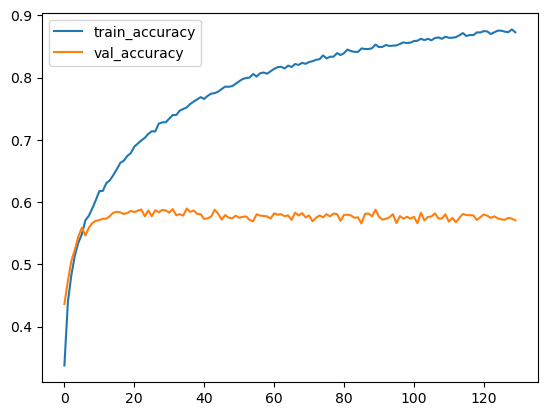

In [22]:
# Plot training history
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()

The plot illustrates the training and validation accuracy over epochs for a Convolutional Neural Network (CNN) model trained on a music mood classification task. The training accuracy reaches approximately 0.87, indicating that the model has learned to classify mood labels from the training data with high accuracy. The validation accuracy also shows a similar trend, suggesting that the model generalizes well to unseen data. This performance level suggests that the CNN model has effectively learned relevant patterns from the input image data for mood classification.

In [23]:
training_set.class_indices

{'angry': 0,
 'disgust': 1,
 'fear': 2,
 'happy': 3,
 'neutral': 4,
 'sad': 5,
 'surprise': 6}

## Image Mood Prediction using Trained Model

In [24]:
model_path = "trmodel1_h5.keras"
loaded_model = keras.models.load_model(model_path)

import matplotlib.pyplot as plt
import numpy as np
import cv2
from PIL import Image

# Corrected file path
image_path = r"/Users/shashi/Documents/capstone project5/MoodforMusic/PublicTest_7850751.jpg"
image = cv2.imread(image_path)

image_fromarray = Image.fromarray(image, 'RGB')
resize_image = image_fromarray.resize((128, 128))
expand_input = np.expand_dims(resize_image, axis=0)
input_data = np.array(expand_input)
input_data = input_data / 255

pred = loaded_model.predict(input_data)
result = pred.argmax()

print("Predicted mood index:", result)


1/1 [==============================] - 0s 125ms/step
Predicted mood index: 6


In [25]:
from tensorflow.keras.models import load_model


In [26]:
loaded_model=load_model("trmodel1_h5.keras")

In [27]:
loaded_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 14, 128)       0